# Создание моделей машинного обучения

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Оптимизация

### 1. Почти производная

In [ ]:
def numerical_derivative_1d(func, epsilon):
    """
    Функция для приближённого вычисления производной функции одной переменной. 
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """

    def deriv_func(x):
        """
        :param x: float — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        # BEGIN YOUR CODE
        approx_deriv = (func(x + epsilon) - func(x)) / epsilon
        return approx_deriv
        # END YOUR CODE

    return deriv_func

In [ ]:
# Проверьте себя!
def polynom_to_prime(x):
    return 20 * x ** 5 + x ** 3 - 5 * x ** 2 + 2 * x + 2.0


def primed_poly(x):
    return 100 * x ** 4 + 3 * x ** 2 - 10 * x + 2.0


approx_deriv = numerical_derivative_1d(polynom_to_prime, 1e-5)

grid = np.linspace(-2, 2, 100)
right_flag = True
tol = 0.05
debug_print = []

for x in grid:
    estimation_error = abs(primed_poly(x) - approx_deriv(x))
    if estimation_error > tol:
        debug_print.append((estimation_error, primed_poly(x), approx_deriv(x)))
        right_flag = False

if not right_flag:
    print("Что-то не то...")
    print(debug_print)
    plt.plot(grid, primed_poly(grid), label="Истинная производная")
    plt.plot(grid, approx_deriv(grid), label="Численное приближение")
    plt.legend()

print(str(right_flag))

True


### 2. Дана функция $y(x) = x^{3} \ln(x)$



In [ ]:
def y(x):
    return (x**3)*np.log(x)

In [ ]:
x_range = np.linspace(-5, 5, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


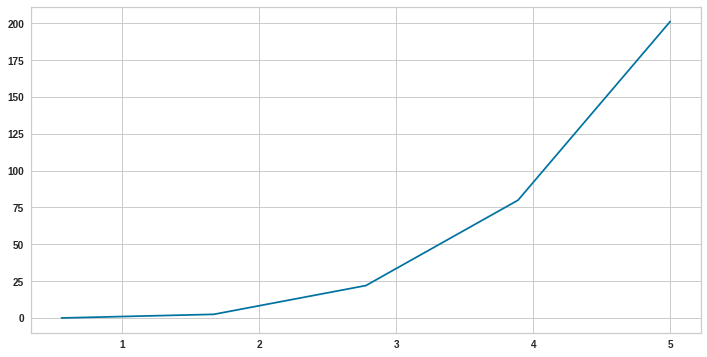

In [ ]:
#Построим график нашей функции
plt.figure(figsize = (12, 6))
plt.plot(x_range, y(x_range));

2.1. Выпишем вид производной этой функции ($y'(x)$). 

$$y'(x) = (3*x^2)*ln(x)+x^2$$

В точке x= 0 производная неопределена

2.2 Реализуем функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [ ]:
def dy(x0):
    res = (3*(x0)**2)*np.log(x0)+(x0)**2
    return res

In [ ]:
x_dif_plot = np.linspace(-50, 50, 1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


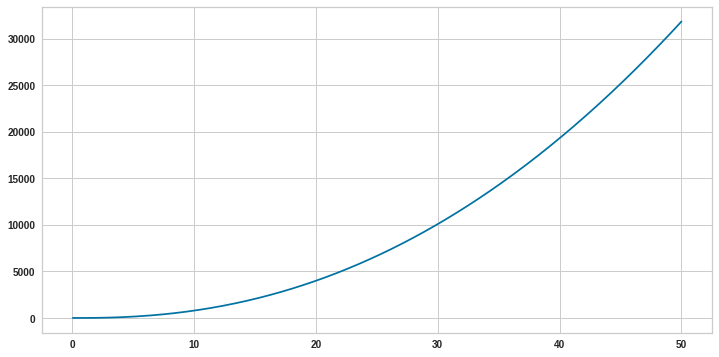

In [ ]:
#Построим график нашей функции
plt.figure(figsize = (12, 6))
plt.plot(x_dif_plot, dy(x_dif_plot));

In [ ]:
#Проверка
print(dy(10), dy(20), dy(30), dy(1))

790.7755278982138 3994.878728264789 10083.23293048782 1.0


2.3 Реализуем функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [ ]:
def get_min_with_gd(x0, steps, lr, thershold):
    history = []
    previous_step_size = 1
    iters = 0
    while previous_step_size > thershold and iters < steps:
        prev_x = x0 #Сохраняем текущий x0 in prev_x
        x0 = x0 - lr * dy(prev_x) #Градиентный спуск
        previous_step_size = abs(x0 - prev_x) #Изменение x
        iters = iters+1 #Итерация
        history.append(x0)
        print("Итерация",iters,"\nзначение X",x0)
        
    print("Локальный минимум", x0)
    return np.array(history)

In [ ]:
# Запустим поиск минимума с любой точки, например с точки 10

history = get_min_with_gd(10, 10000, 0.01, 0.000001)

Итерация 1 
значение X 2.0922447210178623
Итерация 2 
значение X 1.951521065504928
Итерация 3 
значение X 1.8370461022899123
Итерация 4 
значение X 1.7417274027602196
Итерация 5 
значение X 1.6608927398171403
Итерация 6 
значение X 1.5913199242606597
Итерация 7 
значение X 1.5307044974693869
Итерация 8 
значение X 1.4773487892430266
Итерация 9 
значение X 1.4299709375281882
Итерация 10 
значение X 1.3875826531893787
Итерация 11 
значение X 1.3494082365230744
Итерация 12 
значение X 1.3148293244201068
Итерация 13 
значение X 1.2833462258219313
Итерация 14 
значение X 1.2545502611475963
Итерация 15 
значение X 1.2281035856246125
Итерация 16 
значение X 1.203724215668845
Итерация 17 
значение X 1.1811747439987623
Итерация 18 
значение X 1.1602537160651039
Итерация 19 
значение X 1.1407889570443375
Итерация 20 
значение X 1.122632349016235
Итерация 21 
значение X 1.1056557004072927
Итерация 22 
значение X 1.0897474479486393
Итерация 23 
значение X 1.0748100001242773
Итерация 24 
значение X

2.4. Проверка

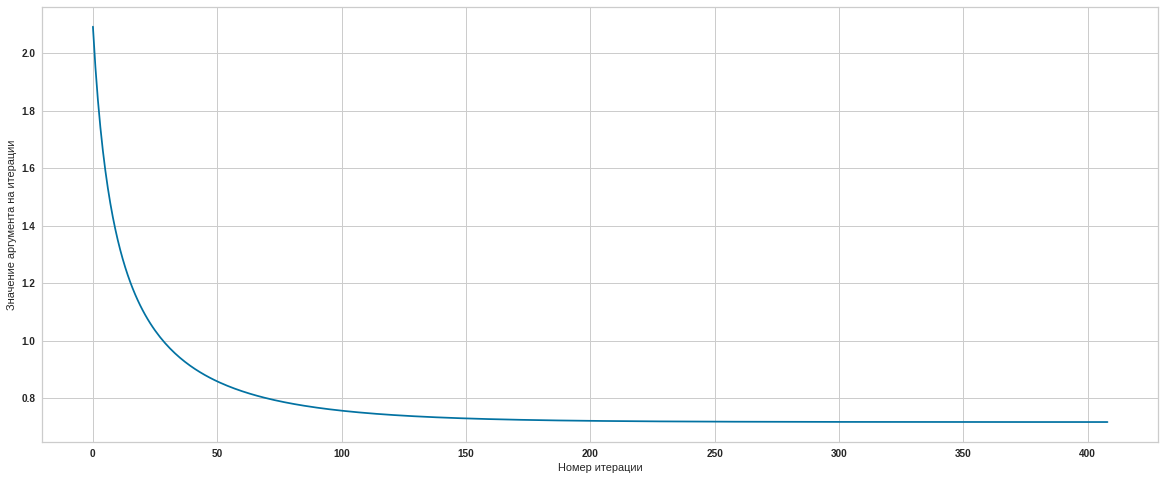

In [ ]:
plt.figure(figsize=(20, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)
plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


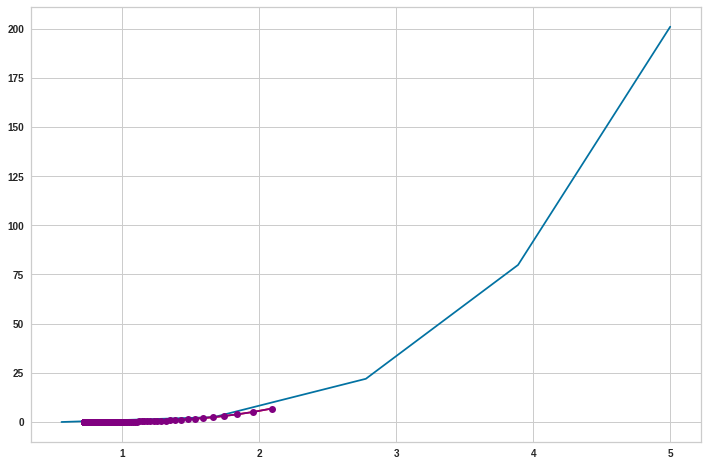

In [ ]:
# Отрисуем путь, который прошел наш алгоритм прежде чем сойтись в минимум
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot()

# Отрисовываем функцию
ax.plot(x_range, y(x_range))
ax.plot(history, y(history),color='red')
ax.plot(history, y(history),color='purple', marker = 'o')

fig.show();

## Регрессия

С 1ого октября отменяется НДС на бриллианты, теперь они становятся новым инвестиционным инструментом. Построим модель ценообразования для них.

Скачайте датасет diamonds.csv

В нем представлены характеристики бриллиантов и их цены с сайта jamesallen (B2C площадка) с 2022-07-01

**Описание полей**


* fluor - флуорисценуия (свойство камня светиться в лучах ультр)
* symmetry - показатель симметричности
* platform - название платформы, где был размещен камень
* quality_group - составной показатель из cut polish symmetry
* size_group - каратно весовая группа
* big_size_group - каратно-весовая группа
* shape - форма
* color - цвет
* clarity - чистота
* cut - качество огранки (может быть только у круглых камней)
* polish - полировка
* id - номер камня
* date - дата
* price - цена
* carat - кол-во карат
* tablepercent - размер площадки по отношению ширине
* price_per_carat - цена за карат
* z - длина (diameter)
* x - ширина
* depth_perc - отношение высоты к ширине
* y - высота



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path + 'diamonds.csv', index_col=0)

In [ ]:
df.head()

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
135269,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,202206,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420
48477,MED,EX,jamesallen,RD,H,VVS2,EX,EX,11725253,202207,7510.0,1.02,7362.75,6.41,6.45,62.5,4.03125
236786,NONE,EX,jamesallen,EM,H,IF,NaN,EX,14444347,202205,21220.0,2.01,10557.21,8.60,6.37,65.0,4.14050
235781,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,202207,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416
277744,NONE,VG,jamesallen,RD,F,VS1,VG,EX,14615276,202206,8480.0,1.00,8480.00,6.28,6.36,62.3,3.96228


Необходимо предсказать `price_per_carat`

### Задание 1: Очистка

Не все камни успевают продаться за один месяц, поэтому в таблице есть повторы. 

**Попробуем найти аномалии:** вдруг цена на некоторые камни сильно меняется (то есть продавец сам не знает, по какой цене их продавать).

Т.к. не все камни продаются за месяц, а цена на камни может поменяться с течением месяца, то будем брать цену за последний месяц, который доступен в данных

In [ ]:
id_stat = df.groupby(by='id')['carat'].count().to_frame() #Посчитайте статистику по кол-ву камней

In [ ]:
df_one = df.query("id in @id_stat.query('carat==1').index")  # те камни, которые встречались один раз

In [ ]:
df_three = df.query("id in @id_stat.query('carat==2 or carat == 3').index") # те камни, которые встречались 2 или 3 раза

In [ ]:
stat = df_three.groupby('id')[['price', 'carat', 'price_per_carat', 'z', 'x', 'depth_perc', 'y']].agg(np.std) # Посчитайте дстандартное отклонение по нескольким полям,
#  подумайте где оно должно равняться 0, а где меняться в каких-то разумных пределах

Стандартное отклонение не должно меняться в столбце y(высота), dept_perc(Отношение высоты к ширине), т.к. размеры камня неизменны, и в столбце carat (количество карат)

In [ ]:
#Предположим, что на разных платформах указывают разные размеры камня
df['platform'].value_counts()

jamesallen    222218
Name: platform, dtype: int64

Все камни размещены на одной платформе, значит предположение неверно и размер камня не может меняться

Цена камня формируется следующим образом: price_per_carat*carat => price может измениться, если изменится цена за карат

Стандартное отклонение в столбце price = 0 значит, что цена на товар не менялась, соответственно цена за карат тоже

In [ ]:
#Посмотрим, есть ли камни, где цена за карат изменилась, а цена камня - нет
stat.query('price == 0 and price_per_carat>0')

,price,carat,price_per_carat,z,x,depth_perc,y
id,,,,,,,
13636926,0.0,0.014142,120.851620,0.000000,0.000000,0.141421,0.009560
14040944,0.0,0.035355,343.505403,0.021213,0.007071,0.070711,0.000028
14772485,0.0,0.056569,468.012765,0.000000,0.000000,0.070711,0.004469
14789652,0.0,0.035355,388.533963,0.042426,0.049497,0.282843,0.048182


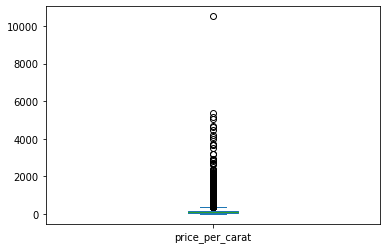

In [ ]:
stat.price_per_carat.plot.box();

In [ ]:
#Выбросы
stat.query('carat > 0 or z > 0 or x > 0 or depth_perc > 0 or y > 0 or (price == 0 and price_per_carat>0) or price_per_carat > 10000')

,price,carat,price_per_carat,z,x,depth_perc,y
id,,,,,,,
19423,334.863156,0.0,318.916742,0.0,0.0,0.404145,0.026835
19501,831.384388,0.0,415.692194,0.0,0.0,0.346410,0.027436
19504,0.000000,0.0,0.000000,0.0,0.0,0.212132,0.014213
19505,813.172798,0.0,404.564074,0.0,0.0,0.353553,0.028602
19585,56.568542,0.0,61.490006,0.0,0.0,0.141421,0.007396
...,...,...,...,...,...,...,...
14894411,212.132034,0.0,198.251528,0.0,0.0,0.424264,0.027917
14894415,0.000000,0.0,0.000000,0.0,0.0,0.494975,0.036133
14894420,0.000000,0.0,0.000000,0.0,0.0,0.353553,0.018067


In [ ]:
#Удалим аномальные наблюдения
df_three = df_three.query("id not in @stat.query('carat > 0 or z > 0 or x > 0 or depth_perc > 0 or y > 0 or (price == 0 and price_per_carat>0) or price_per_carat>10000').index").sort_values(by=['id','date'])

In [ ]:
df_three = df_three.groupby('id').agg('last').reset_index() #тепреь в качестве цены возьмем последнее значение по времени

In [ ]:
df = pd.concat([df_one, df_three]).reset_index(drop=True) # соединяем результаты

Заполним пропуски

In [ ]:
df.isna().sum()

fluor                  4
symmetry               0
platform               0
shape                  0
color                  0
clarity                0
cut                42471
polish                 0
id                     0
date                   0
price                  0
carat                  0
price_per_carat        0
z                      0
x                      0
depth_perc             0
y                      0
dtype: int64

In [ ]:
df['fluor'] = df['fluor'].ffill()

In [ ]:
df['fluor'].value_counts()

NONE    84292
FNT     25468
MED     13163
STG      8700
Name: fluor, dtype: int64

In [ ]:
df['cut'].fillna('unknown', inplace = True)

In [ ]:
df.isna().sum()

fluor              0
symmetry           0
platform           0
shape              0
color              0
clarity            0
cut                0
polish             0
id                 0
date               0
price              0
carat              0
price_per_carat    0
z                  0
x                  0
depth_perc         0
y                  0
dtype: int64

Посмотрим корреляции признаков

In [ ]:
pip install phik==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 7.5 MB/s 
  Created wheel for phik: filename=phik-0.11.1-py3-none-any.whl size=599844 sha256=f9bacb7acd46c5b9d53c2be1f43f96142272f112753947fb20c090308dd59f8c
  Stored in directory: /root/.cache/pip/wheels/a1/99/90/eec9e53e5bacd66746a8651ab3331cdf3004834aa01bc79d4e
Successfully built phik


In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['id', 'date', 'price', 'carat', 'price_per_carat', 'z', 'x', 'depth_perc', 'y']


/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:78: UserWarning: Not enough unique value for variable platform for analysis 1. Dropping this column
  .format(col, df[col].nunique())


,fluor,symmetry,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
fluor,1.00,0.05,0.12,0.16,0.06,0.06,0.01,0.05,0.00,0.00,0.03,0.00,0.08,0.06,0.09,0.04
symmetry,0.05,1.00,0.33,0.11,0.10,0.67,0.33,0.21,0.02,0.02,0.04,0.00,0.25,0.23,0.27,0.20
shape,0.12,0.33,1.00,0.17,0.19,0.80,0.21,0.22,0.21,0.00,0.05,0.00,0.68,0.61,0.84,0.55
color,0.16,0.11,0.17,1.00,0.09,0.15,0.07,0.09,0.01,0.02,0.05,0.00,0.12,0.13,0.12,0.14
clarity,0.06,0.10,0.19,0.09,1.00,0.10,0.21,0.05,0.02,0.05,0.05,0.05,0.10,0.08,0.11,0.05
cut,0.06,0.67,0.80,0.15,0.10,1.00,0.21,0.15,0.09,0.01,0.06,0.00,0.50,0.37,0.55,0.41
polish,0.01,0.33,0.21,0.07,0.21,0.21,1.00,0.27,0.00,0.00,0.02,0.00,0.11,0.11,0.16,0.11
id,0.05,0.21,0.22,0.09,0.05,0.15,0.27,1.00,0.07,0.03,0.08,0.02,0.08,0.09,0.18,0.10
date,0.00,0.02,0.21,0.01,0.02,0.09,0.00,0.07,1.00,0.01,0.02,0.00,0.07,0.03,0.09,0.04
price,0.00,0.02,0.00,0.02,0.05,0.01,0.00,0.03,0.01,1.00,0.68,0.86,0.33,0.67,0.01,0.68


In [ ]:
interval_cols = ['id', 'date', 'price', 'carat', 'price_per_carat', 'z', 'x', 'depth_perc', 'y']
phik_overview = df.phik_matrix(interval_cols = interval_cols)

/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:78: UserWarning: Not enough unique value for variable platform for analysis 1. Dropping this column
  .format(col, df[col].nunique())


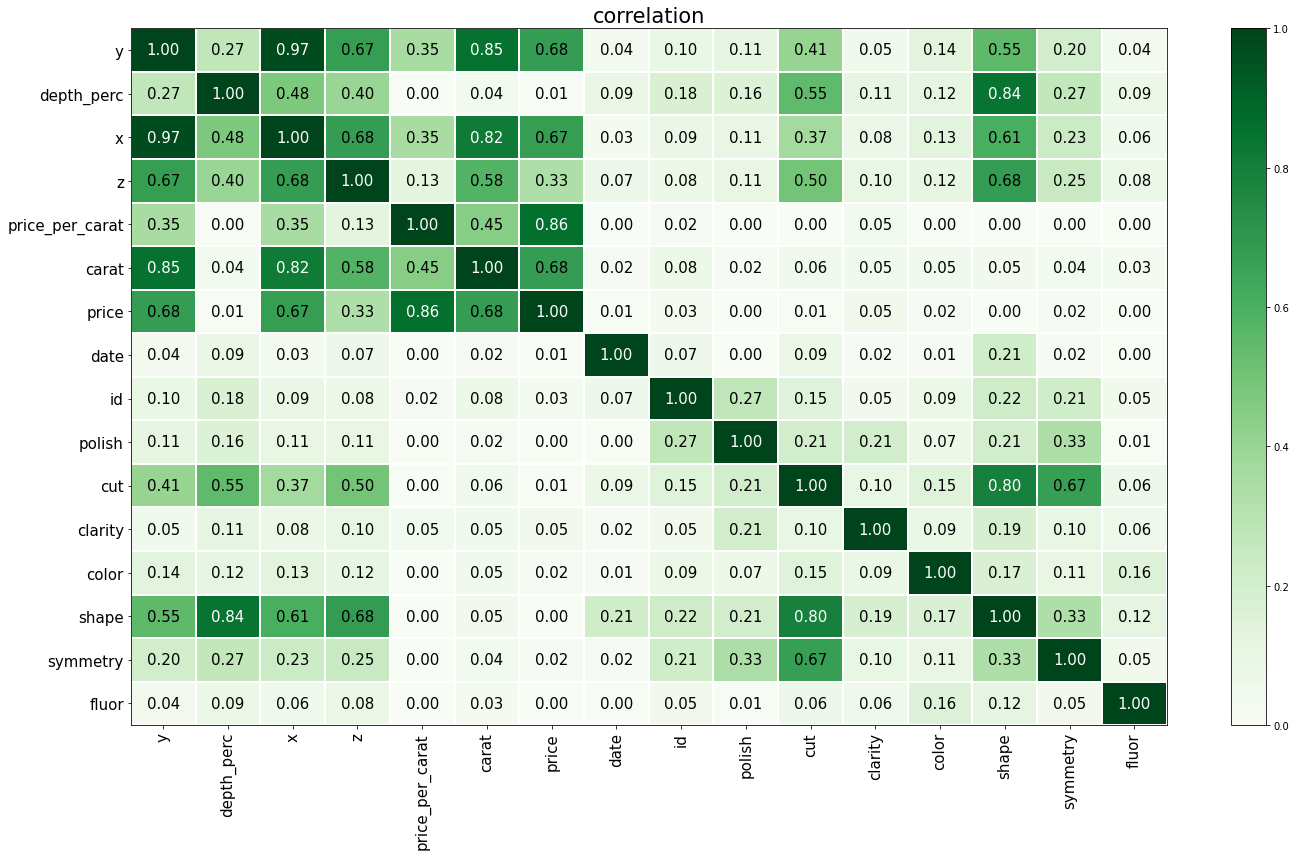

In [ ]:
plot_correlation_matrix(phik_overview.values, 
                       x_labels = phik_overview.columns,
                       y_labels = phik_overview.index,
                       vmin = 0,
                       vmax = 1,
                       color_map= "Greens",
                       fontsize_factor = 1.5,
                       figsize = (20, 12))

Видим высокую корреляцию между: price и price_per_carat, carat; x,y,z и carat; cut, x, y, z, depth_perc и shape

Цены на бриллианты достаточно сильно меняются, попробуем вычислить коэффициент инфляции и привести цены к последнему месяцу. Стоит учесть, что цены на все бриллианты не изменяются синхронно, то есть изменение в определенных группах может быть разным.

In [ ]:
df.head()

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,NONE,EX,jamesallen,PS,D,SI2,unknown,EX,14224443,202205,9120.0,1.51,6039.74,10.67,6.23,59.0,3.67570
1,NONE,VG,jamesallen,EM,K,SI2,unknown,VG,12902293,202205,1390.0,0.91,1527.47,6.30,4.58,71.0,3.25180
2,NONE,VG,jamesallen,PS,J,VS1,unknown,VG,12771762,202207,15990.0,2.27,7044.05,11.66,7.26,62.2,4.51572
3,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700.0,1.01,3663.37,6.37,6.42,62.0,3.98040
4,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170.0,1.00,7170.00,6.30,6.35,63.7,4.04495


In [1]:
categories = ['shape', 'color']

In [ ]:
df_index = df.groupby(['date'] + categories)[['price_per_carat']]\
             .mean()\
             .reset_index() # индекс цен

In [ ]:
df_index

,date,shape,color,price_per_carat
0,202205,CUSH,D,6106.585733
1,202205,CUSH,E,5876.262576
2,202205,CUSH,F,5810.693493
3,202205,CUSH,G,5393.622290
4,202205,CUSH,H,4990.454398
...,...,...,...,...
241,202207,RD,I,7055.855053
242,202207,RD,J,6061.197329
243,202207,RD,K,4972.559316
244,202207,RD,L,4455.250327


In [ ]:
date_max = df_index.date.max()

In [ ]:
df_index = df_index.merge(df_index.query('date == @date_max')[categories + ['price_per_carat']]\
                          .rename(columns={'price_per_carat': 'price_per_carat_max'}), 
                          on=categories, how='outer') # сопоставляем группы с максимальной датой

In [ ]:
df_index

,date,shape,color,price_per_carat,price_per_carat_max
0,202205,CUSH,D,6106.585733,9340.201421
1,202206,CUSH,D,6491.641657,9340.201421
2,202207,CUSH,D,9340.201421,9340.201421
3,202205,CUSH,E,5876.262576,8951.004804
4,202206,CUSH,E,5901.189079,8951.004804
...,...,...,...,...,...
241,202206,RD,L,4292.450194,4455.250327
242,202207,RD,L,4455.250327,4455.250327
243,202205,RD,M,3772.731077,4107.238710
244,202206,RD,M,3905.268117,4107.238710


In [ ]:
df_index['inflation'] = df_index['price_per_carat_max'] / df_index.price_per_carat

In [ ]:
df_index

,date,shape,color,price_per_carat,price_per_carat_max,inflation
0,202205,CUSH,D,6106.585733,9340.201421,1.529529
1,202206,CUSH,D,6491.641657,9340.201421,1.438804
2,202207,CUSH,D,9340.201421,9340.201421,1.000000
3,202205,CUSH,E,5876.262576,8951.004804,1.523248
4,202206,CUSH,E,5901.189079,8951.004804,1.516814
...,...,...,...,...,...,...
241,202206,RD,L,4292.450194,4455.250327,1.037927
242,202207,RD,L,4455.250327,4455.250327,1.000000
243,202205,RD,M,3772.731077,4107.238710,1.088665
244,202206,RD,M,3905.268117,4107.238710,1.051717


In [ ]:
df_with_inf = df.merge(df_index[['date'] + categories + ['inflation']], 
                        on=['date'] + categories, how='left') # соединяем все в одной таблице

In [ ]:
df_with_inf['new_price'] = df_with_inf['price'] * df_with_inf['inflation']

In [ ]:
df_with_inf.sort_values(by='id').head(10)

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y,inflation,new_price
111617,NONE,EX,jamesallen,RD,D,VVS2,EX,EX,19449,202207,17550.0,1.17,15000.00,6.79,6.75,62.0,4.18500,1.000000,17550.000000
75476,MED,EX,jamesallen,RD,D,VS2,EX,VG,19476,202207,19830.0,1.52,13046.05,7.35,7.32,62.0,4.53840,1.000000,19830.000000
111618,NONE,VG,jamesallen,EM SQ,E,VS1,unknown,VG,19507,202207,27560.0,2.03,13576.35,7.20,6.86,70.1,4.80886,1.000000,27560.000000
75550,FNT,EX,jamesallen,EM SQ,E,VS1,unknown,EX,19510,202207,26380.0,2.04,12931.37,7.18,6.89,72.0,4.96080,1.000000,26380.000000
111619,NONE,VG,jamesallen,RD,E,VS1,EX,VG,19518,202207,43650.0,2.11,20687.20,8.31,8.29,60.1,4.98229,1.000000,43650.000000
56746,NONE,VG,jamesallen,RAD,E,VS1,unknown,VG,19613,202207,5820.0,1.01,5762.38,5.83,5.38,70.8,3.80904,1.000000,5820.000000
111620,FNT,VG,jamesallen,RAD,E,VS1,unknown,EX,19635,202207,5690.0,1.02,5578.43,5.93,5.14,70.0,3.59800,1.000000,5690.000000
111621,NONE,G,jamesallen,RAD,D,VS2,unknown,EX,19656,202207,5600.0,1.07,5233.64,5.76,5.51,74.2,4.08842,1.000000,5600.000000
97618,MED,EX,jamesallen,RAD,D,SI1,unknown,EX,19715,202207,12160.0,1.55,7845.16,7.02,6.24,72.3,4.51152,1.000000,12160.000000
104534,NONE,G,jamesallen,EM,E,VS1,unknown,VG,19754,202206,22580.0,2.02,11178.22,8.21,6.63,61.2,4.05756,1.061233,23962.644144


### Задание 2: Модель

Определим функцию потерь (MSE или MAE)

метод подсчета среднеквадратичной ошибки (MSE) в значительной мере чувствителен к выбросам в выборке, или к выборкам где разброс значений очень большой. 
Однако, в подсчете средней абсолютной ошибки (MAE) используется усреднённая сумма модулей разницы между реальным и предсказанным значениями, и поэтому она отличается меньшей чувствительностью к выбросам значений.

Видим, что есть выбросы, разброс большой, поэтому будем использовать MAE

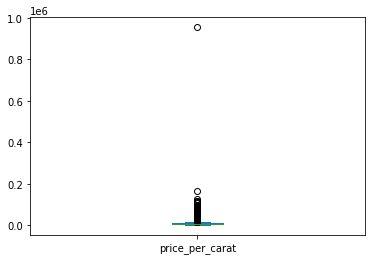

In [ ]:
df['price_per_carat'].plot.box();

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, max_error, mean_absolute_error
from copy import deepcopy
import seaborn as sns

X = df.drop(columns=["price_per_carat"])
y = df["price_per_carat"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
# Посмотрим на размеры получившегося обучающего датасета
X_train.shape

(105298, 16)

In [ ]:
cat_list = df.select_dtypes(object).columns

In [ ]:
labelencoder = LabelEncoder()
X_train_le = X_train.copy()
X_valid_le = X_valid.copy()
X_train_le[cat_list] = X_train_le[cat_list].apply(LabelEncoder().fit_transform)
X_valid_le[cat_list] = X_valid_le[cat_list].apply(LabelEncoder().fit_transform)

In [ ]:
X_train_le.head()

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,z,x,depth_perc,y
55422,2,0,0,9,7,4,0,0,14467048,202205,3670.0,1.01,6.39,6.44,60.0,3.86400
121346,2,0,0,9,3,5,0,0,14422206,202207,9440.0,1.01,6.48,6.51,59.8,3.89298
11899,0,0,0,9,2,2,0,0,14384045,202207,14940.0,1.22,6.89,6.91,61.4,4.24274
103092,2,3,0,7,0,4,3,2,14262557,202207,3910.0,1.00,8.37,5.58,63.0,3.51540
115048,0,0,0,9,1,5,0,0,12873447,202206,18670.0,1.51,7.30,7.34,62.0,4.55080


In [ ]:
X_valid_le.head()

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,z,x,depth_perc,y
105720,2,3,0,9,1,6,1,0,14006074,202205,5690.0,1.00,6.20,6.27,62.0,3.88740
92212,1,0,0,9,0,3,0,0,13823961,202207,7620.0,1.10,6.59,6.60,62.4,4.11840
57133,2,3,0,9,3,3,2,0,14389210,202205,5970.0,1.00,6.19,6.26,64.0,4.19640
62665,2,3,0,0,6,3,1,0,11328205,202205,2810.0,1.20,5.82,5.78,69.0,3.98820
87345,2,0,0,9,5,3,0,0,13121296,202207,22960.0,2.08,8.12,8.17,61.8,5.04906


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Создадим объект класса LinearRegression с параметрами по умолчанию
LR = LinearRegression()

In [ ]:
# Обучим его на обучающей части датасета при помощи метода fit
LR.fit(X_train_le, y_train)

LinearRegression()

In [ ]:
# Получим предсказание нашего дерева при помощи метода predict на обучающем и Валидационном датасете
y_LR_train_predict = LR.predict(X_train_le)
y_LR_valid_predict = LR.predict(X_valid_le)

In [ ]:
#ДФ с метриками
res=pd.DataFrame(columns=['encoder',
                          'train_max_error',
                          'train_mae',
                          'valid_max_error',                          
                          'valid_mae'                        
                         ],
                 data=[['Label_encoder',
                        max_error(y_train, y_LR_train_predict),
                        mean_absolute_error(y_train, y_LR_train_predict),
                        max_error(y_valid, y_LR_valid_predict),
                        mean_absolute_error(y_valid, y_LR_valid_predict)
                        ]]
                )
res

,encoder,train_max_error,train_mae,valid_max_error,valid_mae
0,Label_encoder,688125.106203,1243.909242,116395.958735,1244.357701


Теперь попробуем OHE или TargetEncoder

Нормализуем данные.

In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from typing import Tuple, List


def OHE(df: pd.DataFrame, columns: List[str]) -> Tuple[pd.DataFrame, List[str]]:

    index = df.index
    one = OneHotEncoder(sparse=False, categories='auto')
    ohe = one.fit_transform(df[columns])
    col_names = one.get_feature_names(input_features = columns)
    df = df.drop(columns, axis=1)
    df = df.reset_index(drop=True)
    df = pd.concat([df, pd.DataFrame(ohe, columns=col_names)], axis = 1)
    df = df.set_index(index)
    return (df, col_names)

scaler = StandardScaler() 

In [ ]:
X_train_ohe = OHE(X_train, cat_list)[0]
X_valid_ohe = OHE(X_valid, cat_list)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_ohe_scaled = scaler.fit_transform(X_train_ohe)
X_valid_ohe_scaled = scaler.transform(X_valid_ohe)

In [ ]:
# Обучим его на обучающей части датасета при помощи метода fit
LR.fit(X_train_ohe_scaled, y_train)

LinearRegression()

In [ ]:
# Получим предсказание нашего дерева при помощи метода predict на обучающем и Валидационном датасете
y_LR_train_predict_ohe = LR.predict(X_train_ohe_scaled)
y_LR_valid_predict_ohe = LR.predict(X_valid_ohe_scaled)

In [ ]:
# Посмотрим на наши метрики на обучении и валидации и проанализирем работу алгоритма
res.loc[res.shape[0]]=['OHE',
                        max_error(y_train, y_LR_train_predict_ohe),
                        mean_absolute_error(y_train, y_LR_train_predict_ohe),
                        max_error(y_valid, y_LR_valid_predict_ohe),
                        mean_absolute_error(y_valid, y_LR_valid_predict_ohe)
                      ]
res

,encoder,train_max_error,train_mae,valid_max_error,valid_mae
0,Label_encoder,688125.106203,1243.909242,116395.958735,1244.357701
1,OHE,672668.688952,855.925124,106606.361048,848.885119


Ошибка при OHE уменьшилась по сравненю с LabelEncoder

In [ ]:
tenc = TargetEncoder() 
X_train_tenc = tenc.fit_transform(X_train, y_train)
X_valid_tenc = tenc.fit_transform(X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
X_train_tenc_scaled = scaler.fit_transform(X_train_tenc)
X_valid_scaled = scaler.transform(X_valid_tenc)

In [ ]:
LR.fit(X_train_tenc_scaled, y_train)

LinearRegression()

In [ ]:
# Получим предсказание нашего дерева при помощи метода predict на обучающем и Валидационном датасете
y_LR_train_predict_tenc = LR.predict(X_train_tenc_scaled)
y_LR_valid_predict_tenc = LR.predict(X_valid_scaled)

In [ ]:
# Посмотрим на наши метрики на обучении и валидации и проанализирем работу алгоритма
res.loc[res.shape[0]]=['TargetEncoder',
                        max_error(y_train, y_LR_train_predict_tenc),
                        mean_absolute_error(y_train, y_LR_train_predict_tenc),
                        max_error(y_valid, y_LR_valid_predict_tenc),
                        mean_absolute_error(y_valid, y_LR_valid_predict_tenc)
                      ]
res

,encoder,train_max_error,train_mae,valid_max_error,valid_mae
0,Label_encoder,688125.106203,1243.909242,116395.958735,1244.357701
1,OHE,672668.688952,855.925124,106606.361048,848.885119
2,TargetEncoder,707656.928857,1035.362177,110049.371101,1032.775156


Ошибка увеличилась по сравнению с OHE, самая маленькая ошибка при OHE, самая большая ошибка при labelencoder

Сравним работу выбранной линейной модели с KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(3, n_jobs = -1)

In [ ]:
KNR.fit(X_train_le, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

In [ ]:
y_KNR_train_predict = KNR.predict(X_train_le)
y_KNR_valid_predict = KNR.predict(X_valid_le)

In [ ]:
res.loc[res.shape[0]]=['Labelenc_KNR',
                        max_error(y_train, y_KNR_train_predict),
                        mean_absolute_error(y_train, y_KNR_train_predict),
                        max_error(y_valid, y_KNR_valid_predict),
                        mean_absolute_error(y_valid, y_KNR_valid_predict)
                      ]
res

,encoder,train_max_error,train_mae,valid_max_error,valid_mae
0,Label_encoder,688125.106203,1243.909242,116395.958735,1244.357701
1,OHE,672668.688952,855.925124,106606.361048,848.885119
2,TargetEncoder,707656.928857,1035.362177,110049.371101,1032.775156
3,Labelenc_KNR,587627.913333,748.747671,48119.430000,1075.800130


In [ ]:
KNR.fit(X_train_ohe_scaled, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

In [ ]:
y_KNR_train_predict_ohe = KNR.predict(X_train_ohe_scaled)
y_KNR_valid_predict_ohe = KNR.predict(X_valid_ohe_scaled)

In [ ]:
res.loc[res.shape[0]]=['OHE_KNR',
                        max_error(y_train, y_KNR_train_predict_ohe),
                        mean_absolute_error(y_train, y_KNR_train_predict_ohe),
                        max_error(y_valid, y_KNR_valid_predict_ohe),
                        mean_absolute_error(y_valid, y_KNR_valid_predict_ohe)
                      ]
res

,encoder,train_max_error,train_mae,valid_max_error,valid_mae
0,Label_encoder,688125.106203,1243.909242,116395.958735,1244.357701
1,OHE,672668.688952,855.925124,106606.361048,848.885119
2,TargetEncoder,707656.928857,1035.362177,110049.371101,1032.775156
3,Labelenc_KNR,587627.913333,748.747671,48119.430000,1075.800130
4,OHE_KNR,549341.053333,551.941944,29887.573333,826.785493


In [ ]:
KNR.fit(X_train_tenc_scaled, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

In [ ]:
y_KNR_train_predict_tenc = KNR.predict(X_train_tenc_scaled)
y_KNR_valid_predict_tenc = KNR.predict(X_valid_scaled)

In [ ]:
res.loc[res.shape[0]]=['Target_KNR',
                        max_error(y_train, y_KNR_train_predict_tenc),
                        mean_absolute_error(y_train, y_KNR_train_predict_tenc),
                        max_error(y_valid, y_KNR_valid_predict_tenc),
                        mean_absolute_error(y_valid, y_KNR_valid_predict_tenc)
                      ]
res

,encoder,train_max_error,train_mae,valid_max_error,valid_mae
0,Label_encoder,688125.106203,1243.909242,116395.958735,1244.357701
1,OHE,672668.688952,855.925124,106606.361048,848.885119
2,TargetEncoder,707656.928857,1035.362177,110049.371101,1032.775156
3,Labelenc_KNR,587627.913333,748.747671,48119.430000,1075.800130
4,OHE_KNR,549341.053333,551.941944,29887.573333,826.785493
5,Target_KNR,549341.053333,460.883321,33838.643333,656.599134


KNN показала себя лучше, чем линейная регрессия на всех энкодерах

## Классификация

Загрузим датасет bodyPerformance

Описание:

https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Mounted at /content/drive


In [ ]:
df_ml = pd.read_csv(path + 'bodyPerformance.csv')

In [ ]:
# Посмотрим есть ли в нашем датасете пропуски при помощи метода info
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df_ml.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
(df_ml == ' ?').sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [ ]:
# Посмотрим на число уникальных значений в каждом из столбцов при помощи метода nunique()
df_ml.nunique()

age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64

In [ ]:
#Посмотрим баланс классов
df_ml['gender'].value_counts()

M    8467
F    4926
Name: gender, dtype: int64

Видим дисбаланс классов

### Задание 1: Определение гендера

Построим модель, которая будет определять гендер.

In [ ]:
df_ml.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
#Посмотрим пропуски
print(df_ml.isna().sum())

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


In [ ]:
# Посмотрим на соотношение классов в нашем датасете
print(f"Всего класса 0 в датастее: {(df_ml['gender'] == 'M').sum()}, а класса 1: {(df_ml['gender'] == 'F').sum()}")

Всего класса 0 в датастее: 8467, а класса 1: 4926


Будем использовать ROC-AUC и F1, т.к. они хорошо подходят для несбалансированных классов

In [ ]:
# Создадим объект класса LabelEncoder
enc = LabelEncoder()
df_1 = df_ml.copy()
df_1[['gender', 'class']] = df_1[['gender', 'class']].apply(LabelEncoder().fit_transform)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

X = df_1.drop(columns=["gender"])
y = df_1["gender"]

X_train, X_valid, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
X_train = pd.get_dummies(
    X_train,
    columns=X_train.select_dtypes(object).columns,
    drop_first=True
)

In [ ]:
X_valid = pd.get_dummies(
    X_valid,
    columns=X_valid.select_dtypes(object).columns,
    drop_first=True
)

In [ ]:
# Отмасштабируем наши признаки
# Создадим объект класса StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_valid)

In [ ]:
# Построим логистическую регрессию на новых данных

# Создадим объект класса LogisticRegression с параметрами по умолчанию
model_LR = LogisticRegression(class_weight = 'balanced')

# Обучим его на обучающем датасете
model_LR.fit(X_train, y_train)

# Получим предсказания и посмотрим на долю правильных ответов:
y_pred_test_LR = model_LR.predict(X_test)
y_pred_train_LR = model_LR.predict(X_train)

print(f"Доля врено угаданных объектов {(y_pred_test_LR == y_test).sum() / len(y_test)}")

Доля врено угаданных объектов 0.9906681597611049


In [ ]:
# Создадим объект класса KNeighborsClassifier 
model_knn = KNeighborsClassifier(3)

# Обучим его на обучающем сете 
model_knn.fit(X_train, y_train)

# Получим предсказания для обучающего и тестового датасета
y_pred_train_KNN = model_knn.predict(X_train)
y_pred_test_KNN  = model_knn.predict(X_test)

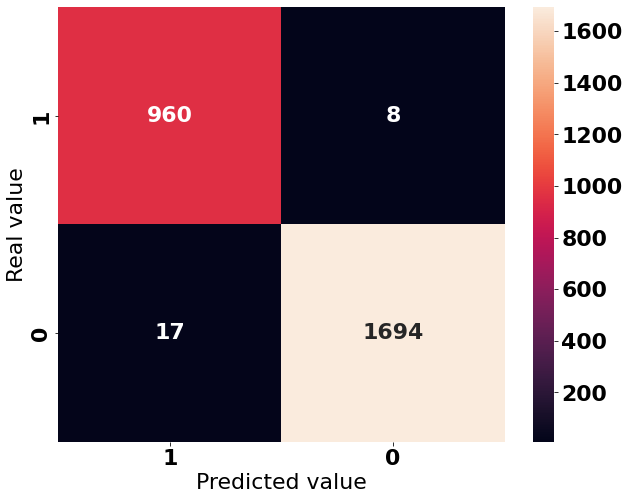

In [ ]:
# импортируем функцию confusion_matrix из модуля metrics библиотеки sklearn
from sklearn.metrics import confusion_matrix

# Для нашей задачи матрица ошибок
mp_mtx = confusion_matrix(y_test, y_pred_test_LR)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
plt.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=df_1["gender"].unique(), 
            yticklabels=df_1["gender"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value");

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Посчитаем для нашей модели LogisticRegression на обучающем и тестировочном кусках 
print(f"TEST:  F1 -- {f1_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: F1 -- {f1_score(y_train, y_pred_train_LR)}")

TEST:  F1 -- 0.9926750659244066
TRAIN: F1 -- 0.9899859060900527


In [ ]:
# Посчитаем для нашей модели knn на обучающем и тестировочном кусках 
print(f"TEST:  F1 -- {f1_score(y_test, y_pred_test_KNN)}")
print(f"TRAIN: F1 -- {f1_score(y_train, y_pred_train_KNN)}")

TEST:  F1 -- 0.9915229465068693
TRAIN: F1 -- 0.9933353080568721


In [ ]:
# Посмотрим эту метрику и для логистической регрессии и для knn (несмотря на то, что мы опустили алгоримт нахождения вероятностей для knn)

# Для ROC-AUC нужны вероятности принадлежности положительному классу
# Для получения вероятностей воспользуемся методом predict_proba и нам нужен второй столбец
y_pred_prob_test_LR = model_LR.predict_proba(X_test)[:, 1]
y_pred_prob_test_KNN = model_knn.predict_proba(X_test)[:, 1]
y_pred_prob_train_LR = model_LR.predict_proba(X_train)[:, 1]
y_pred_prob_train_KNN = model_knn.predict_proba(X_train)[:, 1]

# Посчитаем для нашей модели knn на обучающем и тестировочном кусках 
print("Logistic Regression")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_test, y_pred_prob_test_LR)}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, y_pred_prob_train_LR)}")
print("kNN")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_test, y_pred_prob_test_KNN)}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, y_pred_prob_train_KNN)}")

Logistic Regression
TEST:  ROC-AUC -- 0.9971405248489357
TRAIN: ROC-AUC -- 0.9980615363028795
kNN
TEST:  ROC-AUC -- 0.9949805222406307
TRAIN: ROC-AUC -- 0.9997226465513709


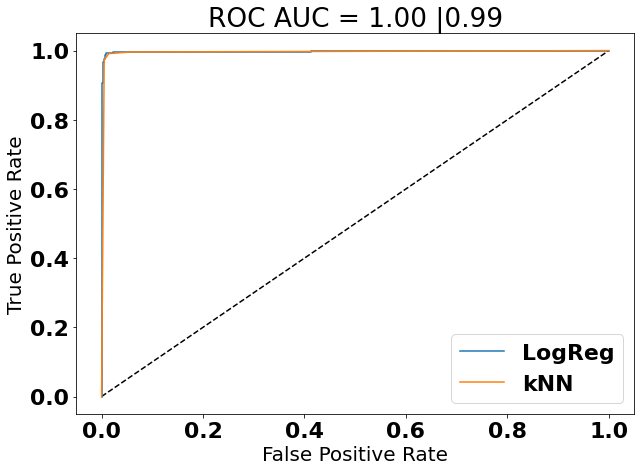

In [ ]:
# построим ROC-кривую. Это наглядный способ понять как хорошо работает алгоритм

from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_test_LR)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_test_KNN)

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label="LogReg")
plt.plot(fpr_knn, tpr_knn, label="kNN")
plt.title(f'ROC AUC = {auc(fpr_lr, tpr_lr):.2f} |{auc(fpr_knn, tpr_knn):.2f}')
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)
plt.legend()
plt.show()

Задача линейно разделима, метрики LR на тестовой выборке лучше, чем у KNN

### Задание 2: Определение класса

Теперь опробуем построить модель, которая будет предсказывать class физической формы.

Для этого определите метрики качества для задачи мультиклассификации (аргументируйте выбор).

Постройте модель мультиклассовой классификации на основе линейного классификатора и сравните с KNN.

Нам бы хотелось пользоваться такими же метриками, как и при бинарной классификации, но поскольку у нас большее число классов, нам нужно как-то считать метрики в бинарном случае и потом из усреднять. На этой идее и строятся два основных подхода подсчета:

macro -- подсчет метрик в биноризированном случае и их дальнейшее усреднение
micro -- подсчет TP, TN, FP, FN для каждого класса в бинарном случае, а затем использование их суммы в соответствующих формулах метрик.
Рассчитаем руками macro и micro precision для матрицы ошибок в нашей задаче.

При подсчете Macro Average мы теряем информацию о кол-ве наблюдений, поэтому ее лучше не использовать при дисбалансе классов.

In [ ]:
# закодируем категориальные столбцы label-энкодером
from sklearn.preprocessing import LabelEncoder

# Создадим объект класса LabelEncoder
enc = LabelEncoder()
df_2 = df_ml.copy()
df_2[['gender', 'class']] = df_2[['gender', 'class']].apply(LabelEncoder().fit_transform)

In [ ]:
X = df_2.drop(columns=["class"]) # укажите новый таргет
y = df_2["class"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
multi_log_reg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
multi_knn =  KNeighborsClassifier(3).fit(X_train, y_train)

In [ ]:
# Сделаем предсказания
multi_y_log_reg = multi_log_reg.predict(X_valid)
multi_y_log_reg_proba = multi_log_reg.predict_proba(X_valid)

In [ ]:
# Сделаем предсказания
multi_y_knn = multi_knn.predict(X_valid)
multi_y_knn_proba = multi_knn.predict_proba(X_valid)

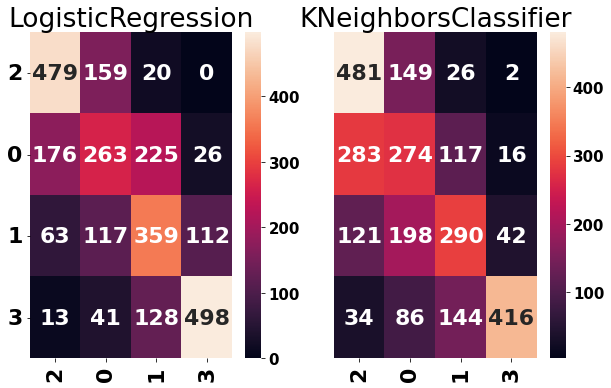

In [ ]:
# Построим матрицу ошибок, чтобы понять как справляется наш алгоритм
mp_mtx = confusion_matrix(y_valid, multi_y_log_reg)
knn_mtx = confusion_matrix(y_valid, multi_y_knn)
f,(ax1,ax2) = plt.subplots(1,2, figsize=(10, 6))
ax1.get_shared_y_axes().join(ax2)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
g1 = sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=df_2["class"].unique(), 
            yticklabels=df_2["class"].unique(),ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g1.set_title('LogisticRegression')
g2 = sns.heatmap(knn_mtx, annot=True, fmt="d", 
            xticklabels=df_2["class"].unique(), 
            yticklabels=df_2["class"].unique(),ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_title('KNeighborsClassifier')
g2.set_yticks([])
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
plt.show();

In [ ]:
# Проверим себя
from sklearn.metrics import precision_score
print(f"MACRO PRECISION LR: {precision_score(y_valid, multi_y_log_reg, average='macro')}")
print(f"MICRO PRECISION LR: {precision_score(y_valid, multi_y_log_reg, average='micro')}")
print(f"MACRO PRECISION KNN: {precision_score(y_valid, multi_y_knn, average='macro')}")
print(f"MICRO PRECISION KNN: {precision_score(y_valid, multi_y_knn, average='micro')}")

MACRO PRECISION LR: 0.59554276503062
MICRO PRECISION LR: 0.5968645016797313
MACRO PRECISION KNN: 0.5718743171972933
MICRO PRECISION KNN: 0.5453527435610303


In [ ]:
# Рассчитаем ROC-AUC разными стратегиями

print(f"OvO LR: {roc_auc_score(y_valid, multi_y_log_reg_proba, multi_class='ovo')}")
print(f"OvR LR: {roc_auc_score(y_valid, multi_y_log_reg_proba, multi_class='ovr')}")
print(f"OvO KNN: {roc_auc_score(y_valid, multi_y_knn_proba, multi_class='ovo')}")
print(f"OvR KNN: {roc_auc_score(y_valid, multi_y_knn_proba, multi_class='ovr')}")

OvO LR: 0.8413374485260402
OvR LR: 0.8412932624925269
OvO KNN: 0.7722532979323082
OvR KNN: 0.772192689399915


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


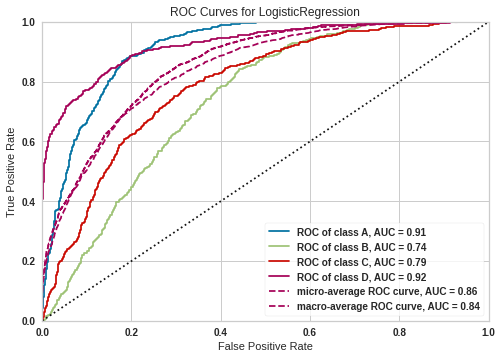

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(multi_log_reg, classes=["A", "B", "C", "D"])
visualizer.fit(X_train, y_train)        
visualizer.score(X_valid, y_valid)        
visualizer.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


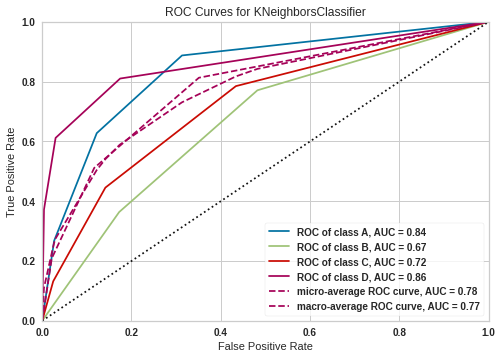

In [ ]:
visualizer_knn = ROCAUC(multi_knn, classes=["A", "B", "C", "D"])
visualizer_knn.fit(X_train, y_train)       
visualizer_knn.score(X_valid, y_valid)        
visualizer_knn.show();

В задаче мультиклассификации базовая модель LR показала себя лучше Knn и имеет лучшие показатели метрик